In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/ph_fires_matched_2.1.csv')

In [2]:
df['building_fires'] = df[[x for x in df.columns if 'building_fires' in x]].sum(axis=1)
df['severe_fires'] = df[[x for x in df.columns if 'inc_type_111_' in x]].sum(axis=1)
df['fires_per_unit'] = df.apply(lambda x: x.building_fires / x.total_dwelling_units if x.total_dwelling_units > 0 else 0, axis=1)

In [4]:
df['full_address'] = df.apply(lambda x: x['corrected_address'].title() + '\n' + x.std_city.title() + ', ' + x.std_st, axis=1)


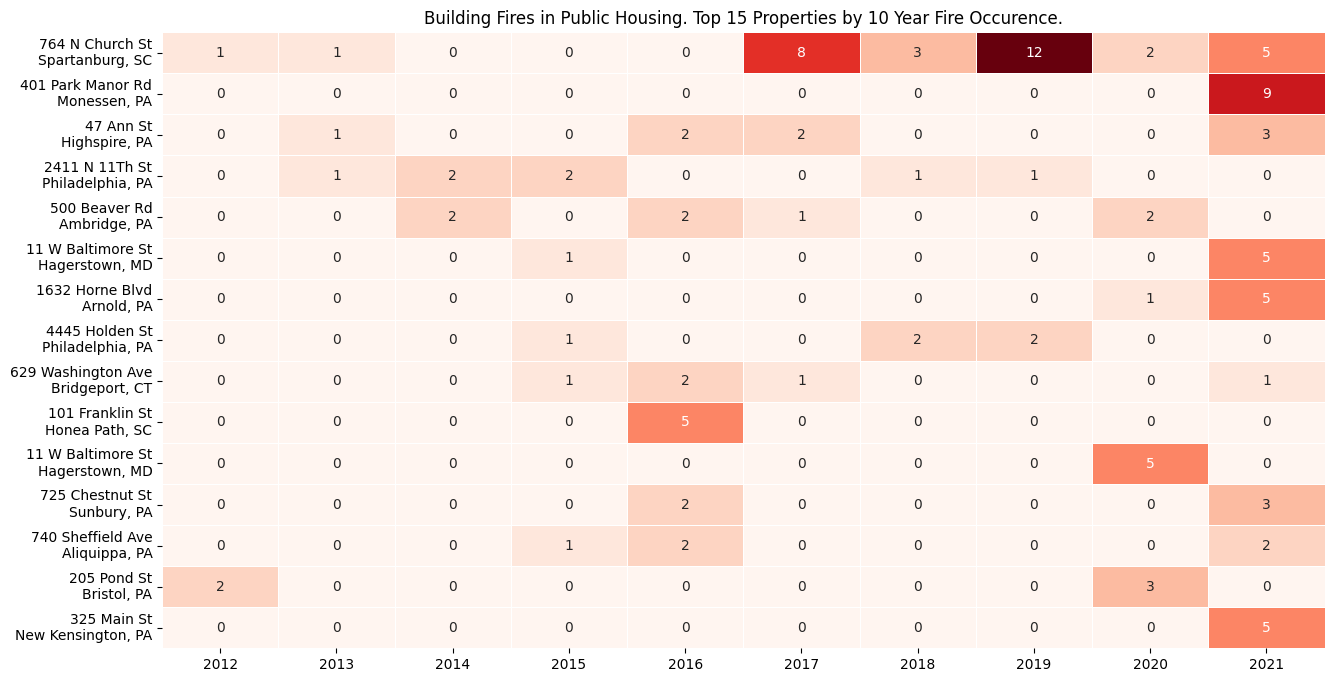

In [5]:
pdf = df.copy()

TOPN = 15
pdf = pdf.set_index('full_address')
pdf = pdf.sort_values('severe_fires', ascending=False)[[x for x in pdf.columns if 'inc_type_111_' in x]].head(TOPN)

custom_labels = [
    year
    for year in range(2012, 2022)
]

plt.figure(figsize=(15, 8))
ax = sns.heatmap(pdf, cmap='Reds', annot=True, fmt=".0f", linewidths=.5, cbar=False)
ax.set_title(f'Building Fires in Public Housing. Top {TOPN} Properties by 10 Year Fire Occurence.')
ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xticklabels(custom_labels, rotation=0)  

plt.show()

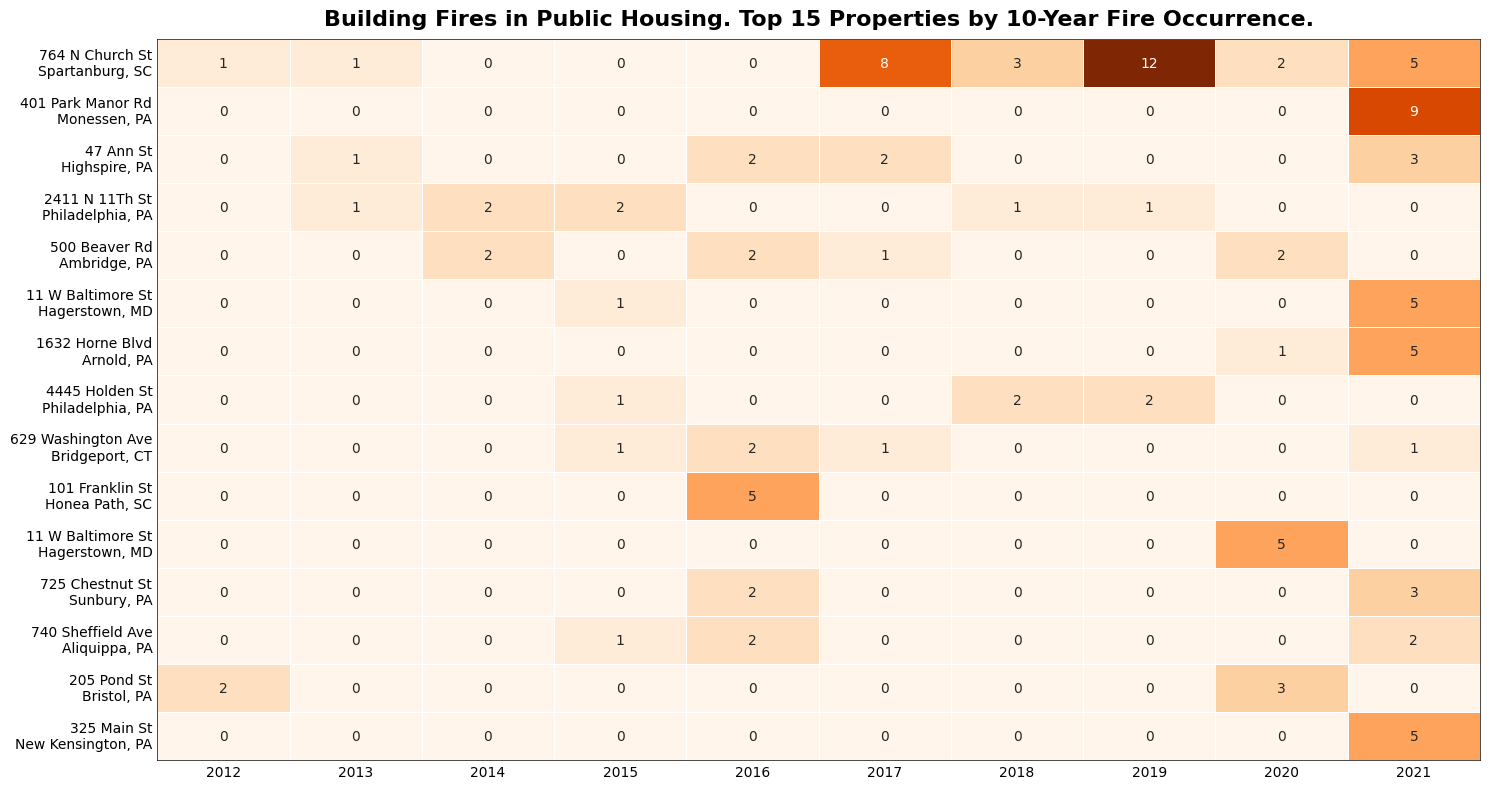

In [21]:
pdf = df.copy()
TOPN = 15
pdf = pdf.set_index('full_address')
pdf = pdf.sort_values('severe_fires', ascending=False)[[x for x in pdf.columns if 'inc_type_111_' in x]].head(TOPN)

custom_labels = [str(year) for year in range(2012, 2022)]

plt.figure(figsize=(15, 8))

ax = sns.heatmap(pdf, cmap='Oranges', annot=True, fmt=".0f", linewidths=.5, cbar=False, 
                 )

# Title and Labels
title = ax.set_title(f'Building Fires in Public Housing. Top {TOPN} Properties by 10-Year Fire Occurrence.', fontsize=16, weight='bold', pad=10)
ax.set_xticklabels(custom_labels, rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Adding border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(.5)
    spine.set_edgecolor('black')

# sns.despine(bottom=True, left=True)
ax.tick_params(length=0)
plt.ylabel(None)


plt.tight_layout()
plt.show()
